# Laptop Price Prediction

#### Importing necessary libraries

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [27]:
data = pd.read_csv('datasets/laptop_price.csv', encoding ='latin1')
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


#### Some basis data exploration and cleaning (checking for null values)

In [7]:
print(data.columns)
print("\nData shape: ", data.shape)

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

Data shape:  (1303, 13)


In [28]:
#Checking for null values
print("\n Checking for null values")
data.isnull().sum()


 Checking for null values


laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [29]:
data.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [30]:
data.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


## Feature Engineering

#### - To better understand what factors really affect laptop prices, we will now `extract and reorganize` our data

#### - Getting rid of the `Company and Product columns` as they are `not very important features` and would increase chance of errors.

#### - Note that we can `extract the screen resolution` from our data.

#### - We use `pd.loc[]` to extract & create a new row for `touch screen devices either (yes or no)`

In [8]:
#Creating a new column TouchScreen for devices with touch screen

data.loc[data['ScreenResolution'].str.contains('Touchscreen'),'TouchScreen']="Yes"

#Replacing Nan values with no
data.loc[data['TouchScreen'].isnull(), 'TouchScreen']="No"

data.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0,Yes
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0,Yes
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0,No
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0,No
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0,No


#### -We then get the `pixel count from the screen resolution` column using `Regular Expressions`

#### -It is very `useful` when it comes to `filtering alphanumeric values`

In [9]:
data['ScreenResolution']=data['ScreenResolution'].str.extract('(\d\d\d\d?x\d\d\d\d?)', expand = True)

data.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0,Yes
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0,Yes
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0,No
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0,No
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0,No


#### Dealing with the memory feature. Since the memory column contains various types of memory (SSD, HHD, SSHD, and Flash 
#### Storage),  we need to create four different columns for different memory types and extract their memory capacities individually 

    1.HDD memory type

In [10]:
#First lets extract any HDD memory values
data['HDD']=data['Memory'].str.extract('(\d\d\d?GB\sHDD|\dTB\sHDD|\d\.0TB\sHDD)',expand=True)

#Now we extract just the quantity of TB
data['HDD']=data['HDD'].str.extract('(\d\d\d?|\dTB|\d\.0TB)',expand=True)

#Converting the memory from TBs to GBs
data['HDD']=data['HDD'].str.replace('(TB|\.0TB)','000',regex=True)

#Fill NA values with zero
data['HDD'].fillna(0,inplace=True)
data.head(30)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,HDD
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,No,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,No,0
2,3,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,No,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,No,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,No,0
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00,No,500
6,7,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97,No,0
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70,No,0
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00,No,0
9,10,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00,No,0


    2.SSD memory type

In [11]:
#First lets extract any HDD memory values
data['SSD']=data['Memory'].str.extract('(\d\d\d?GB\sSSD|\dTB\sSSD|\d\.0TB\sSSD)',expand=True)

#Now we extract just the quantity of TB
data['SSD']=data['SSD'].str.extract('(\d\d\d?|\dTB|\d\.0TB)',expand=True)

#Converting the memory from TBs to GBs
data['SSD']=data['SSD'].str.replace('(TB|\.0TB)','000',regex=True)

#Fill NA values with zero
data['SSD'].fillna(0,inplace=True)
data.head(30)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,HDD,SSD
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,No,0,128
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,No,0,0
2,3,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,No,0,256
3,4,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,No,0,512
4,5,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,No,0,256
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00,No,500,0
6,7,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97,No,0,0
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70,No,0,0
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00,No,0,512
9,10,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00,No,0,256


    3.Flash Storage type

In [12]:
#First lets extract any HDD memory values
data['Flash Storage']=data['Memory'].str.extract('(\d\d\d?GB\sFlash Storage|\dTB\sFlash Storage|\d\.0TB\sFlash Storage)',expand=True)

#Now we extract just the quantity of TB
data['Flash Storage']=data['Flash Storage'].str.extract('(\d\d\d?|\dTB|\d\.0TB)',expand=True)

#Converting the memory from TBs to GBs
data['Flash Storage']=data['Flash Storage'].str.replace('(TB|\.0TB)','000',regex=True)

#Fill NA values with zero
data['Flash Storage'].fillna(0,inplace=True)
data.head(30)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,HDD,SSD,Flash Storage
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,No,0,128,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,No,0,0,128
2,3,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,No,0,256,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,No,0,512,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,No,0,256,0
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00,No,500,0,0
6,7,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97,No,0,0,256
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70,No,0,0,256
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00,No,0,512,0
9,10,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00,No,0,256,0


    4.Hybrid type

In [13]:
#First lets extract any HDD memory values
data['Hybrid']=data['Memory'].str.extract('(\d\d\d?GB\sHybrid|\dTB\sHybrid|\d\.0TB\sHybrid)',expand=True)

#Now we extract just the quantity of TB
data['Hybrid']=data['Hybrid'].str.extract('(\d\d\d?|\dTB|\d\.0TB)',expand=True)

#Converting the memory from TBs to GBs
data['Hybrid']=data['Hybrid'].str.replace('(TB|\.0TB)','000',regex=True)

#Fill NA values with zero
data['Hybrid'].fillna(0,inplace=True)
data.head(30)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,HDD,SSD,Flash Storage,Hybrid
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,No,0,128,0,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,No,0,0,128,0
2,3,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,No,0,256,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,No,0,512,0,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,No,0,256,0,0
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00,No,500,0,0,0
6,7,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97,No,0,0,256,0
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70,No,0,0,256,0
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00,No,0,512,0,0
9,10,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00,No,0,256,0,0


  5.SSHD (SSD + HDD) type

In [14]:
#Converting SSD and HDD to ints
data = data.astype({'SSD': 'int', 'HDD': 'int'})

#Now we create the SSHD memory type
data['SSHD'] = np.where((data['SSD'] > 0) & (
    data['HDD'] > 0), data['SSD'] + data['HDD'], 0)

#### Now we remove the units from the Weight and Ram Columns 

In [15]:
data['Weight'] = data['Weight'].str.extract('(\d.\d\d|\d.\d|\d)', expand=True)
data['Ram'] = data['Ram'].str.extract('(\d\d|\d)', expand=True)
data.tail(100)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,HDD,SSD,Flash Storage,Hybrid,SSHD
1203,1221,Dell,XPS 13,Ultrabook,13.3,3200x1800,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.2,2680.0,Yes,0,512,0,0,0
1204,1222,Asus,FX502VM-DM105T (i7-6700HQ/8GB/1TB/GeForce,Gaming,15.6,1920x1080,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.2,1169.0,No,1000,0,0,0,0
1205,1223,Dell,Inspiron 5567,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon R7 M445,Windows 10,2.36,889.0,No,0,256,0,0,0
1206,1224,HP,15-bs025nv (i5-7200U/8GB/256GB/W10),Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.91,579.0,No,0,256,0,0,0
1207,1225,Lenovo,IdeaPad 320-15AST,Notebook,15.6,1366x768,AMD E-Series 9000 2.2GHz,4,500GB HDD,AMD Radeon R2 Graphics,Windows 10,2.2,299.0,No,500,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,638.0,Yes,0,128,0,0,0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,1499.0,Yes,0,512,0,0,0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,229.0,No,0,0,64,0,0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.0,No,1000,0,0,0,0


#### Now we get rid of the SSD and HDD where x>0 for x in Hybrid

In [16]:
data.loc[data.SSHD>0, "HDD"] = 0
data.loc[data.SSHD>0, "SSD"] = 0
data.tail(800)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,HDD,SSD,Flash Storage,Hybrid,SSHD
503,510,Lenovo,IdeaPad 320-14IAP,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,500GB HDD,Intel HD Graphics 500,Windows 10,2.1,299.0,No,500,0,0,0,0
504,511,Lenovo,Chromebook N23,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,16GB SSD,Intel HD Graphics 400,Chrome OS,1.25,265.0,No,0,16,0,0,0
505,512,Lenovo,ThinkPad 13,Notebook,13.3,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.44,949.0,No,0,256,0,0,0
506,513,Asus,ZenBook UX510UX-CN211T,Notebook,15.6,1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD + 1TB HDD,Intel HD Graphics 620,Windows 10,2,1224.0,No,0,0,0,0,1256
507,514,Acer,Aspire A515-51G-59QF,Notebook,15.6,1920x1080,Intel Core i5 8250U 1.6GHz,4,1TB HDD,Nvidia GeForce MX150,Windows 10,2.2,613.0,No,1000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,638.0,Yes,0,128,0,0,0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,1499.0,Yes,0,512,0,0,0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,229.0,No,0,0,64,0,0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.0,No,1000,0,0,0,0


#### NB: We drop the GPU feature because there  exists so much variability in GPUs. 

    - Intel GPUs are intergrated 
    - Nvidia GPUs are discrete
    - AMD GPUs are either discrete or intergrated.
    
#### Therefore, labeling each one would take a large amount of time and effort, which may not contribute significantly in the model.

In [17]:
data = data.drop('Gpu', axis=1)

### CPU Feature Extraction

In [18]:
data['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

#### We store each Cpu variant in a list and loop through our dataframe to filter them out into a new dataframe

In [26]:
intel = ["Intel Core i5", "Intel Core i7", "Intel Core i3", "Intel Atom", "Intel Celeron", "Intel Pentium", "Intel Xeon", "Intel Core M"]
amd = ["AMD A9-Series", "AMD E-Series", "AMD A6-Series", "AMD Ryzen", "AMD FX", "AMD A10-Series", "AMD A4-Series", "AMD A12-Series", "AMD A8-Series"]
samsung = ["Samsung Cortex"]

cpu_names = intel + amd + samsung
cpu_names

['Intel Core i5',
 'Intel Core i7',
 'Intel Core i3',
 'Intel Atom',
 'Intel Celeron',
 'Intel Pentium',
 'Intel Xeon',
 'Intel Core M',
 'AMD A9-Series',
 'AMD E-Series',
 'AMD A6-Series',
 'AMD Ryzen',
 'AMD FX',
 'AMD A10-Series',
 'AMD A4-Series',
 'AMD A12-Series',
 'AMD A8-Series',
 'Samsung Cortex']

In [20]:
#Loop to find pattern matches and create column for each Cpu type
for i in range(0, len(cpu_names)):
    data[cpu_names[i]] = data["Cpu"].str.extract(f'({cpu_names[i]})..', expand = True)
    
data[cpu_names]

,Intel Core i5,Intel Core i7,Intel Core i3,Intel Atom,Intel Celeron,Intel Pentium,Intel Xeon,Intel Core M,AMD A9-Series,AMD E-Series,AMD A6-Series,AMD Ryzen,AMD FX,AMD A10-Series,AMD A4-Series,AMD A12-Series,AMD A8-Series,Samsung Cortex
0,Intel Core i5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Intel Core i5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Intel Core i5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Intel Core i7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Intel Core i5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,NaN,Intel Core i7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,Intel Core i7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1300,NaN,NaN,NaN,NaN,Intel Celeron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1301,NaN,Intel Core i7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#Function to check if a string is NaN
def isNaN(string):
    return string != string

#Looping through rows to select the non null values
#We store the values in a list and later convert to series and merge with the main list
final_cpu = []
for i in range(len(data)):
    row = data[cpu_names].iloc[i]
    for j in range(len(row)):
        if isNaN(row[j]) == False:
            final_cpu.append(row[j]) 
            continue

In [22]:
#Dropping unnecessary columns
data = data.drop([*cpu_names,"Memory", "laptop_ID", "Product", "Company"], axis=1)

#Adding our processed Cpu feature
cpu_final = pd.DataFrame(final_cpu)
data["Cpu"] = cpu_final

#### We save our improved dataset

In [24]:
#Lets save our processed data
data.to_csv('datasets/processed_data.csv', index=False) 

## Exploratory data analysis

#### Lets plot some graphs to check how each feature relates to the variability of the price

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

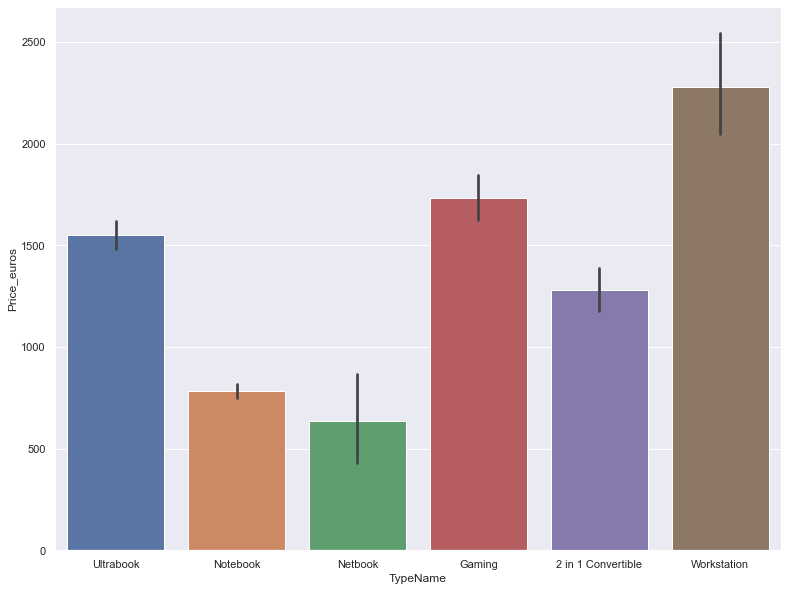

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
#We load our cleaned dataset
data = pd.read_csv("datasets/processed_data.csv")


#Converting units to numerical
data = data.astype({'Weight': 'float', 'Flash Storage': 'int', 'Ram': 'int'})

plt.subplots(figsize=(13,10))
sns.barplot(x="TypeName", y="Price_euros", data=data)

#### We can see that Gaming and Workstation laptops have the highest prices as expected since they always have better specs like 
#### memory and CPU to meet expectations of clients in the proffesional workspace.

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

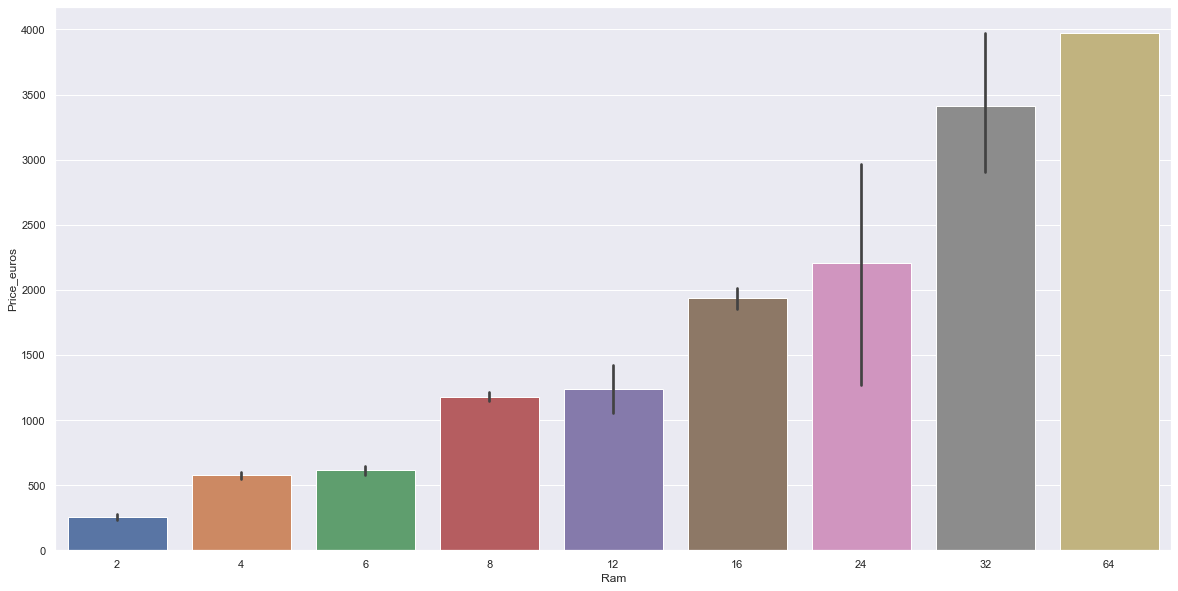

In [27]:
plt.subplots(figsize=(20,10))
sns.barplot(x="Ram", y="Price_euros", data=data)

#### It is clear that higher Ram memory reflects higher prices.

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

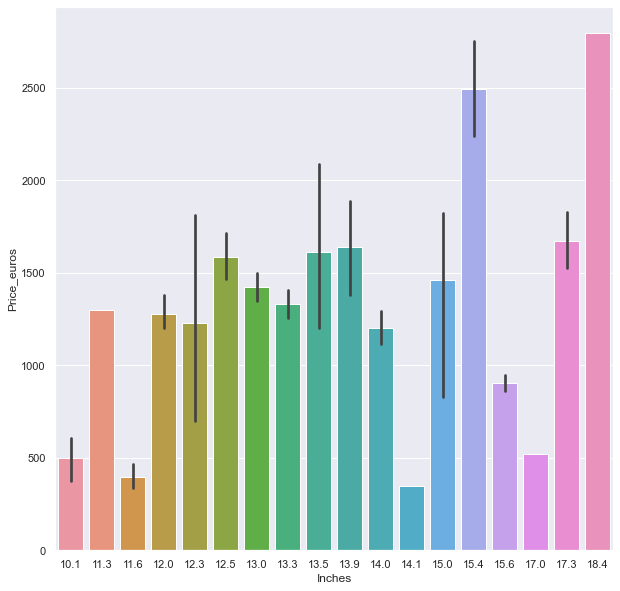

In [28]:
plt.subplots(figsize=(10,10))
sns.barplot(x="Inches", y="Price_euros", data=data)

#### For the screen size, there seems to be no consistency since other specifications have more influence on the price of the laptop.

<AxesSubplot:xlabel='Cpu', ylabel='Price_euros'>

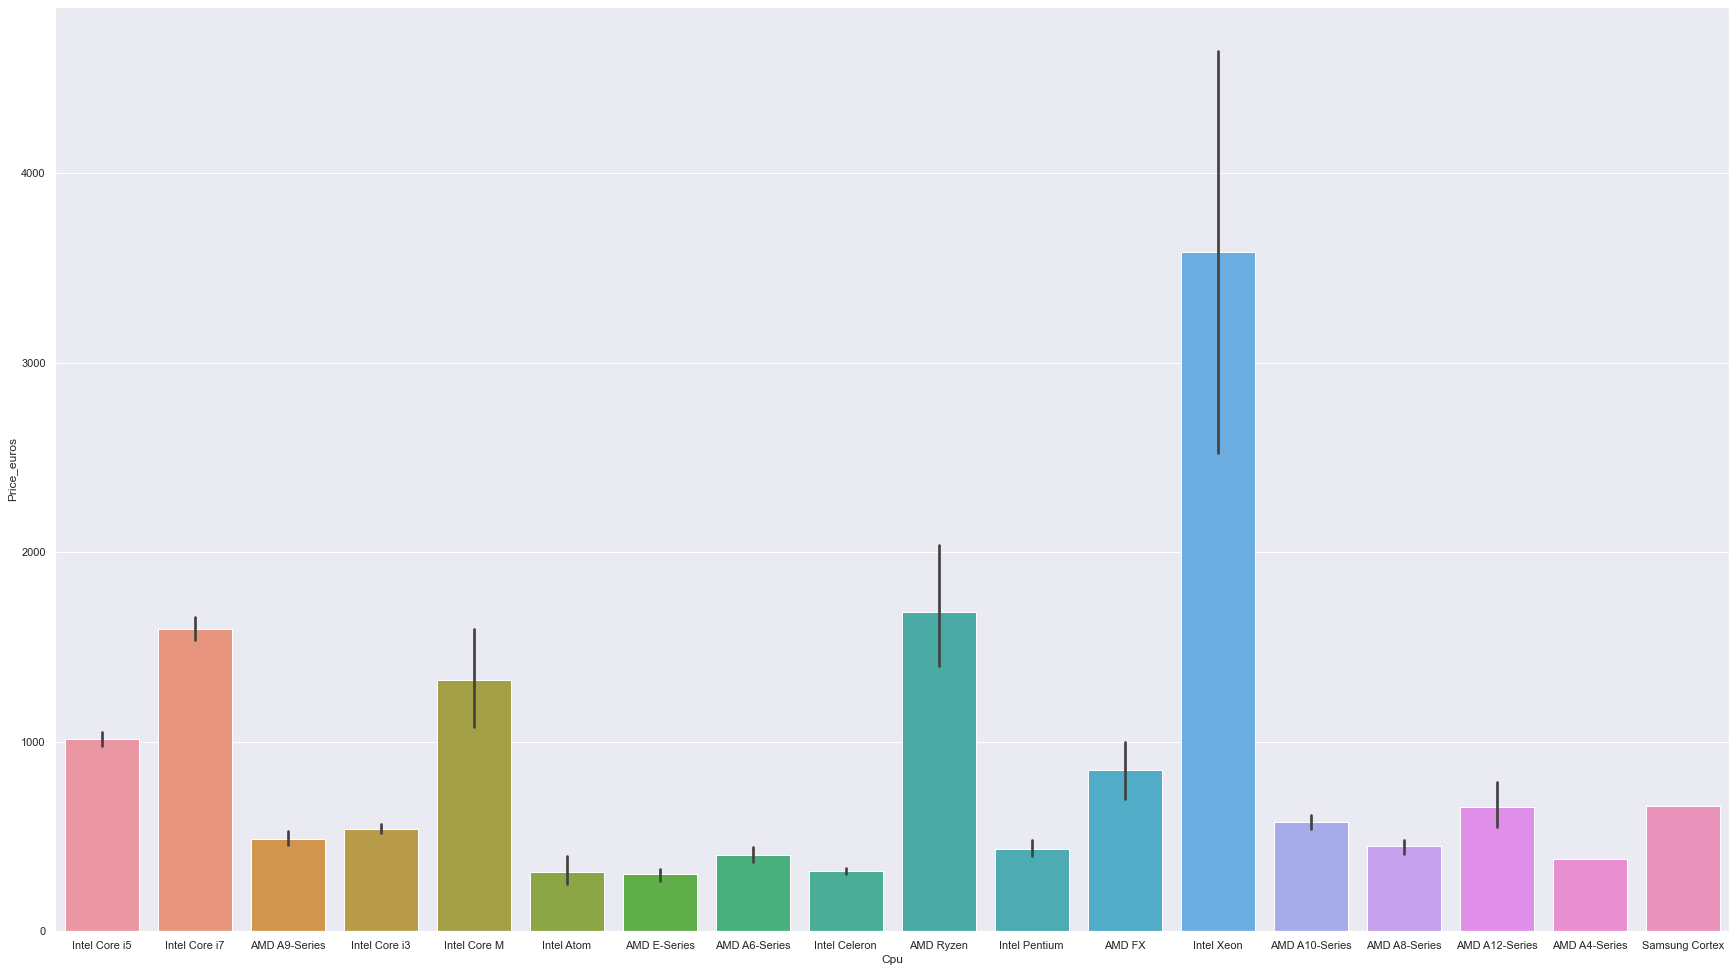

In [24]:
plt.subplots(figsize=(30,17))
sns.barplot(x="Cpu", y="Price_euros", data=data)

#### - In general, Intel CPU prices follow this trend (Intel Xeon > i7 > i5 > i3) and AMD follows (Ryzen > A-series > E-series)

#### - But the plot shows something different about the Intel. For eg,Intel core M seems to have a higher price that core i5 and i3. Lets further investigate this phenomenon

#### - Using pandas library, we can compute the average of the features that relate to i5 and intel M  laptops

In [30]:
data = data.astype({'SSD': 'int', 'HDD': 'int', 'Weight': 'float', 'Flash Storage': 'int', 'Ram': 'int'})
sample = data.loc[data['Cpu'].str.contains('Intel Core M|Intel Core i5')]
sample.groupby(["Cpu"]).mean()

,Inches,Ram,Weight,Price_euros,HDD,SSD,Flash Storage,Hybrid,SSHD
Cpu,,,,,,,,,
Intel Core M,12.521053,7.789474,1.088421,1324.231579,0.000000,255.157895,87.578947,0.000000,0.000000
Intel Core i5,14.802600,6.959811,1.900095,1015.015248,247.347518,148.160757,3.026005,5.929078,89.513002


#### - As seen, `Intel M` laptops generally have a `higher capacity of Ram, memory (SSD), and lighter in weight` than core i5 laptops. 
#### -These other features are the `contributors` of the `higher price` in intel core M laptops.

### Data Transformation and Processing

Lets rename and `convert` our features to numerical values since our `machine learning model only accepts numerical values`. Here, we convert the features that are `non-numerical` and we compute their `cardinalitities`. 

In [31]:
#Lets check the features that are object type
for i in data.columns:
    if data[i].dtype == 'object':
        print("%-10s\n%-30s\n%-10d\n"%
            (i,data[i].unique(),data[i].nunique()))

TypeName  
['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
6         

ScreenResolution
['2560x1600' '1440x900' '1920x1080' '2880x1800' '1366x768' '2304x1440'
 '3200x1800' '1920x1200' '2256x1504' '3840x2160' '2160x1440' '2560x1440'
 '1600x900' '2736x1824' '2400x1600']
15        

Cpu       
['Intel Core i5' 'Intel Core i7' 'AMD A9-Series' 'Intel Core i3'
 'Intel Core M' 'Intel Atom' 'AMD E-Series' 'AMD A6-Series'
 'Intel Celeron' 'AMD Ryzen' 'Intel Pentium' 'AMD FX' 'Intel Xeon'
 'AMD A10-Series' 'AMD A8-Series' 'AMD A12-Series' 'AMD A4-Series'
 'Samsung Cortex']
18        

OpSys     
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
9         

TouchScreen
['No' 'Yes']                  
2         



#### - For features with only 2 categories, we will use label encoding, otherwise, we use one hot encoding. For eg the 'TouchScreen' feature has only 2 categories 'yes' and 'no'

We label encode the `Touchscreen` and Cpu `columns`

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["TouchScreen"] = pd.DataFrame(le.fit_transform(data["TouchScreen"]))
data["Cpu"] = pd.DataFrame(le.fit_transform(data["Cpu"]))
data.head()

,TypeName,Inches,ScreenResolution,Cpu,Ram,OpSys,Weight,Price_euros,TouchScreen,HDD,SSD,Flash Storage,Hybrid,SSHD
0,Ultrabook,13.3,2560x1600,13,8,macOS,1.37,1339.69,0,0,128,0,0,0
1,Ultrabook,13.3,1440x900,13,8,macOS,1.34,898.94,0,0,0,128,0,0
2,Notebook,15.6,1920x1080,13,8,No OS,1.86,575.00,0,0,256,0,0,0
3,Ultrabook,15.4,2880x1800,14,16,macOS,1.83,2537.45,0,0,512,0,0,0
4,Ultrabook,13.3,2560x1600,13,8,macOS,1.37,1803.60,0,0,256,0,0,0


One hot encoding `TypeName` and `OpSys` features

In [33]:
#OpSys and TypeName have lower cardinality so we shall use one hot encoding (pd.getdummies())
encoded_typenames = pd.get_dummies(data["TypeName"])
encoded_opsys = pd.get_dummies(data["OpSys"])
data_1 = pd.concat([data, encoded_typenames, encoded_opsys], axis=1)

Here, we manually encode the `Screen Resolution` feature `since we know the order of their magnitude`

In [34]:
Screen_Res_dict={'1366x768' : 1, '1440x900' : 2 , '1600x900': 3, '1920x1080': 4, '1920x1200': 5, '2160x1440': 6, 
                 '2304x1440': 7, '2256x1504': 8, '2560x1440': 9, '2400x1600':10, '2560x1600':11, '2880x1800':12, 
                  '3200x1800': 13, '3840x2160':14}
data_1['ScreenResolution'] = data_1.ScreenResolution.map(Screen_Res_dict)
data_1

,TypeName,Inches,ScreenResolution,Cpu,Ram,OpSys,Weight,Price_euros,TouchScreen,HDD,...,Workstation,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,Ultrabook,13.3,11.0,13,8,macOS,1.37,1339.69,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Ultrabook,13.3,2.0,13,8,macOS,1.34,898.94,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Notebook,15.6,4.0,13,8,No OS,1.86,575.00,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Ultrabook,15.4,12.0,14,16,macOS,1.83,2537.45,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Ultrabook,13.3,11.0,13,8,macOS,1.37,1803.60,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2 in 1 Convertible,14.0,4.0,14,4,Windows 10,1.80,638.00,1,0,...,0,0,0,0,0,0,1,0,0,0
1299,2 in 1 Convertible,13.3,13.0,14,16,Windows 10,1.30,1499.00,1,0,...,0,0,0,0,0,0,1,0,0,0
1300,Notebook,14.0,1.0,10,2,Windows 10,1.50,229.00,0,0,...,0,0,0,0,0,0,1,0,0,0
1301,Notebook,15.6,1.0,14,6,Windows 10,2.19,764.00,0,1000,...,0,0,0,0,0,0,1,0,0,0


#### We save our processed data for the modeling phase

In [1]:
#Lets save the data for modelling process
data_1.to_csv("datasets/ready_data.csv", index=False)

NameError: name 'data_1' is not defined

## Modeling

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("datasets/ready_data.csv")
df = df.dropna(axis=0)
df.head()

,TypeName,Inches,ScreenResolution,Cpu,Ram,OpSys,Weight,Price_euros,TouchScreen,HDD,...,Workstation,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,Ultrabook,13.3,11.0,13,8,macOS,1.37,1339.69,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Ultrabook,13.3,2.0,13,8,macOS,1.34,898.94,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Notebook,15.6,4.0,13,8,No OS,1.86,575.00,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Ultrabook,15.4,12.0,14,16,macOS,1.83,2537.45,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Ultrabook,13.3,11.0,13,8,macOS,1.37,1803.60,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df.columns

Index(['TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'OpSys',
       'Weight', 'Price_euros', 'TouchScreen', 'HDD', 'SSD', 'Flash Storage',
       'Hybrid', 'SSHD', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'Android', 'Chrome OS', 'Linux', 'Mac OS X',
       'No OS', 'Windows 10', 'Windows 10 S', 'Windows 7', 'macOS'],
      dtype='object')

#### - Train test splitting the dataset for training.

In [6]:
#Target variable price
target = df["Price_euros"]

indep_cols = list(df.columns)
for i in ["TypeName", "OpSys","Price_euros"]:
    indep_cols.remove(i)
indep_cols

#Independent variables
features = df[indep_cols]

from sklearn.preprocessing import StandardScaler

# create the scaler object
scaler = StandardScaler()

# fit and transform the feature you want to standardize
features['Inches'] = scaler.fit_transform(features[['Inches']])
features['SSD'] = scaler.fit_transform(features[['SSD']])
features['HDD'] = scaler.fit_transform(features[['HDD']])
features['SSHD'] = scaler.fit_transform(features[['HDD']])
features['Weight'] = scaler.fit_transform(features[['Weight']])
features['Ram'] = scaler.fit_transform(features[['Ram']])



#Train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=0)

<ipython-input-6-21d8e6377e48>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Inches'] = scaler.fit_transform(features[['Inches']])
<ipython-input-6-21d8e6377e48>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['SSD'] = scaler.fit_transform(features[['SSD']])
<ipython-input-6-21d8e6377e48>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [8]:
features.columns

Index(['Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Weight', 'TouchScreen',
       'HDD', 'SSD', 'Flash Storage', 'Hybrid', 'SSHD', '2 in 1 Convertible',
       'Gaming', 'Netbook', 'Notebook', 'Ultrabook', 'Workstation', 'Android',
       'Chrome OS', 'Linux', 'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S',
       'Windows 7', 'macOS'],
      dtype='object')

In [9]:
X_train.shape

(872, 26)

#### Training with different Machine Learning Models inlcuding , `Decision Tree Regressor`, `Random Forest Regressor`, 
#### `XGboost` and `Multiple-Linear Regression`.

#### Training with the `Random Forest Regressor`

In [8]:
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor

def get_mae_random(max_leaf_nodes,X_train,X_test, y_train, y_test ):
    model1 = RandomForestRegressor(max_leaf_nodes = max_leaf_nodes, random_state=0)
    model1.fit(X_train,y_train)
    model1_preds = model1.predict(X_test)
    print("R2 score: %.2f"%(r2_score(y_test,model1_preds)))
    mae = mean_absolute_error(y_test, model1_preds)
    return (mae)
for max_leaf_nodes in [5,10,20,50,100,200,300, 500]:
    mae=get_mae_random(max_leaf_nodes,X_train,X_test,y_train,y_test)
    print("Max leaf nodes: %d \t\t MAE: %d\n"%(max_leaf_nodes, mae))

R2 score: 0.61
Max leaf nodes: 5 		 MAE: 307

R2 score: 0.68
Max leaf nodes: 10 		 MAE: 266

R2 score: 0.72
Max leaf nodes: 20 		 MAE: 243

R2 score: 0.74
Max leaf nodes: 50 		 MAE: 222

R2 score: 0.74
Max leaf nodes: 100 		 MAE: 214

R2 score: 0.74
Max leaf nodes: 200 		 MAE: 212

R2 score: 0.73
Max leaf nodes: 300 		 MAE: 212

R2 score: 0.73
Max leaf nodes: 500 		 MAE: 212



#### Training with `Decision Tree Regressor` with `changing parameters`

In [10]:
#Training with decision tree regressor
from sklearn.tree import DecisionTreeRegressor

def get_mae_decision(max_leaf_nodes,X_train,X_test,y_train, y_test):
    model1 = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state=0)
    model1.fit(X_train,y_train)
    model1_preds = model1.predict(X_test)
    print("R2 score: %.2f"%(r2_score(y_test,model1_preds)))
    mae = mean_absolute_error(y_test, model1_preds)
    return (mae)
for max_leaf_nodes in [5,10,20,50,100,200,300, 500]:
    mae = get_mae_decision(max_leaf_nodes,X_train,X_test,y_train,y_test)
    print("Max leaf nodes: %d \t\t MAE: %d\n"%(max_leaf_nodes, mae))

R2 score: 0.56
Max leaf nodes: 5 		 MAE: 321

R2 score: 0.65
Max leaf nodes: 10 		 MAE: 281

R2 score: 0.66
Max leaf nodes: 20 		 MAE: 273

R2 score: 0.67
Max leaf nodes: 50 		 MAE: 248

R2 score: 0.68
Max leaf nodes: 100 		 MAE: 241

R2 score: 0.68
Max leaf nodes: 200 		 MAE: 240

R2 score: 0.66
Max leaf nodes: 300 		 MAE: 251

R2 score: 0.66
Max leaf nodes: 500 		 MAE: 250



#### Training with `Linear Regressor` with `changing parameters`

In [11]:
#Training with linear regression and changing parameters

from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(X_train,y_train)
preds=model2.predict(X_test)
r2score=r2_score(y_test,preds)
MAE = mean_absolute_error(y_test, preds)
print("R2 score: %.2f"%(r2score))
print("MAE: %d"%(MAE))

R2 score: 0.75
MAE: 262


#### Training with `XGBOOST Regressor`


In [12]:
#Training with XGBoost

from xgboost import XGBRegressor
model3 = XGBRegressor()
model3.fit(X_train,y_train)
preds3=model3.predict(X_test)
r2score=r2_score(y_test, preds3)
MAE = mean_absolute_error(y_test, preds3)
print("R2 score: %.2f"%(r2score))
print("MAE: %d"%(MAE))

R2 score: 0.77
MAE: 202


In [45]:
y_train.shape

(872,)

In [80]:
for i in X_train.columns:
    print(i, X_train[i][24])

Inches 0.4077206733520466
ScreenResolution 4.0
Cpu 14
Ram -0.07553241002130011
Weight -0.1942389789783199
TouchScreen 0
HDD -0.5771216155678984
SSD 0.5738774788976433
Flash Storage 0
Hybrid 0
SSHD -0.5771216155678984
2 in 1 Convertible 0
Gaming 0
Netbook 0
Notebook 0
Ultrabook 1
Workstation 0
Android 0
Chrome OS 0
Linux 0
Mac OS X 0
No OS 0
Windows 10 1
Windows 10 S 0
Windows 7 0
macOS 0


In [11]:
!pip install tensorflow --upgrade

  Using cached tensorflow-2.12.0-cp38-cp38-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp38-cp38-win_amd64.whl (272.8 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\cachehit1110\\anaconda3\\Lib\\site-packages\\google\\~-otobuf\\internal\\_api_implementation.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached protobuf-4.22.3-cp38-cp38-win_amd64.whl (420 kB)
     ---------------------------------------- 5.6/5.6 MB 6.7 MB/s eta 0:00:00
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached ml_dtypes-0.1.0-cp38-cp38-win_amd64.whl (120 kB)
  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl (42.2 MB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached grpcio-1.54.0-cp38-cp38-win_amd64.whl (4.1 MB)
  Using cached google_auth-2.17.3-py2.py3-none-any.whl (178 kB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.2
    Uninstalling scipy-1.5.2:
      Successfully uninstalled scipy-1.5.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0


In [12]:
!pip install keras --upgrade


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Training with the `Multi-Layer Perceptron`

In [10]:
#Multi-Layer Perceptron
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.optimizers import Adam


# Define the MLP architecture
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1] , activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compile the MLP
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mse'])

# Train the MLP
model.fit(X_train, y_train, batch_size=32, epochs=1000)

# Evaluate the MLP
loss, accuracy = model.evaluate(X_test, y_test)


ImportError: cannot import name 'dtensor' from 'tensorflow.compat.v2.experimental' (C:\Users\cachehit1110\anaconda3\lib\site-packages\tensorflow\_api\v2\compat\v2\experimental\__init__.py)

#### Evaluating the `MultiLayer Perceptron`

In [35]:
# Make predictions
predictions = model.predict(X_test)

# Make predictions
predictions = model.predict(X_test)
MAE = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error", MAE)

r2score = r2_score(y_test, predictions)
print("R2 score is:", r2score)

253.84618596063657
R2 score is: 0.7411398851473623
